In [1]:
import torch.nn as nn
import cv2
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from visualize import Data,visualize_model
from model import Gen,Des
from utils import *
imageSize = 128
batchsize = 32

In [2]:
transform = transforms.Compose([transforms.Resize((imageSize,imageSize)), transforms.ToTensor(), transforms.Normalize(mean=0.5, std=0.5)])
data = ImageFolder(root = "COVID-19_Radiography_Dataset",transform = transform)
dataloader = DataLoader(data,shuffle = True,batch_size = batchsize)

In [3]:
print(data.class_to_idx)

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [4]:
diseases_data = Data('COVID-19_Radiography_Dataset','png')

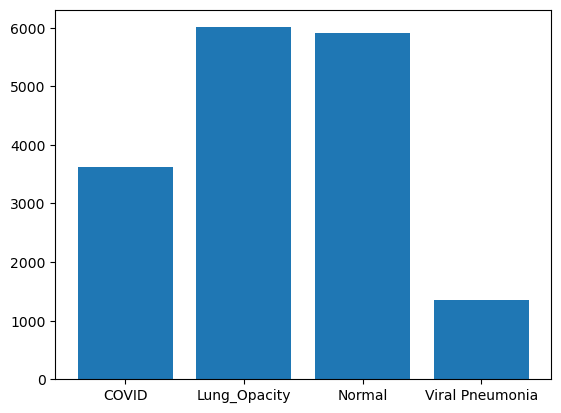

In [5]:
diseases_data.bar_graph()

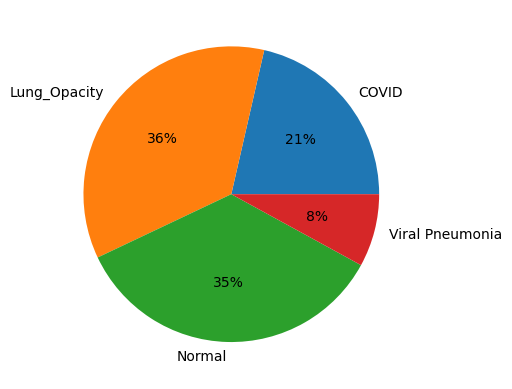

In [6]:
diseases_data.pie_chart()

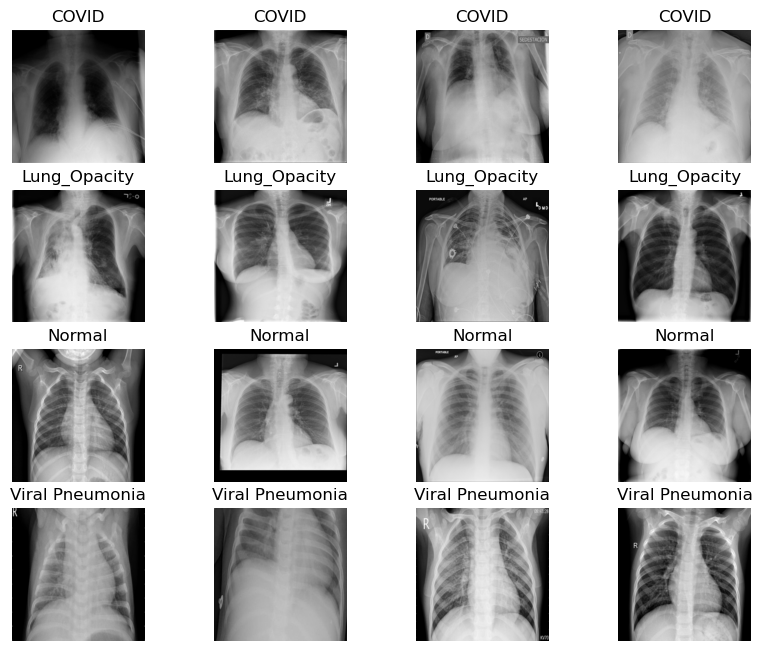

In [7]:
diseases_data.show_random_samples()

In [8]:
Genrator = Gen()
Descriminator  =Des(128)

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
Genrator.to(device)
Descriminator.to(device)
Genrator.apply(weights_init_normal)
Descriminator.apply(weights_init_normal)

Des(
  (conv1): Conv2d(4, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch5): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(1024, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (embed): Embedding(4, 16384)
)

In [11]:
print(Genrator)

Gen(
  (conv1): ConvTranspose2d(200, 2048, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (batch1): BatchNorm2d(2048, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch2): BatchNorm2d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch3): BatchNorm2d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch4): BatchNorm2d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch5): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): ConvTranspose2d(128, 3, kernel_size=(4,

In [12]:
print(Descriminator)

Des(
  (conv1): Conv2d(4, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch5): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(1024, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (embed): Embedding(4, 16384)
)


In [10]:
loss_desc,loss_gen = train(device,100,Descriminator,Genrator,dataloader,128)

C:\Users\abdel\anaconda3\envs\tfgpu\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\abdel\anaconda3\envs\tfgpu\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - >

 err_d=1.6839629411697388  err_g=2.447998285293579  0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - >

 err_d=1.4047152996063232  err_g=2.5881495475769043  1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - >

 err_d=1.047834038734436  err_g=4.582030296325684  2
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - >

 err_d=0.6684940457344055  err_g=3.8558919429779053  3
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - >

 err_d=0.6234073042869568  err_g=4.327369213104248  4
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - >

 err_d=1.5927293300628662  err_g=1.0380994081497192  5
- - - - - - - - - - 

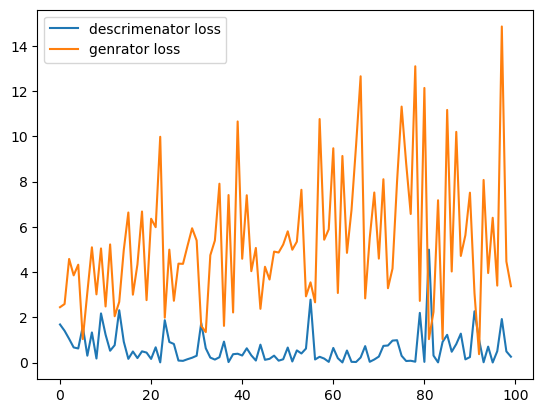

In [11]:
model_visualizer = visualize_model(loss_desc,loss_gen)
model_visualizer.visualize_loss()

In [2]:
from utils import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

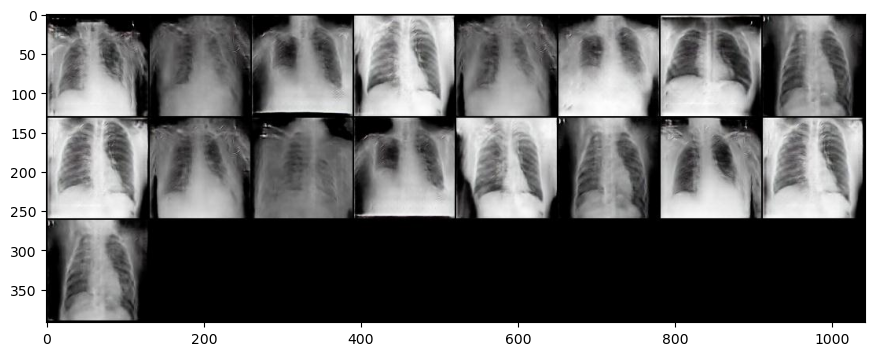

In [3]:
show_image('output/fake_99.jpg')

C:\Users\abdel\anaconda3\envs\new_tfgpu\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\abdel\anaconda3\envs\new_tfgpu\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([17, 4, 128, 128])
torch.Size([17, 64, 64, 64])
torch.Size([17, 128, 32, 32])
torch.Size([17, 256, 16, 16])
torch.Size([17, 1024, 4, 4])
torch.Size([17, 1, 1, 1])


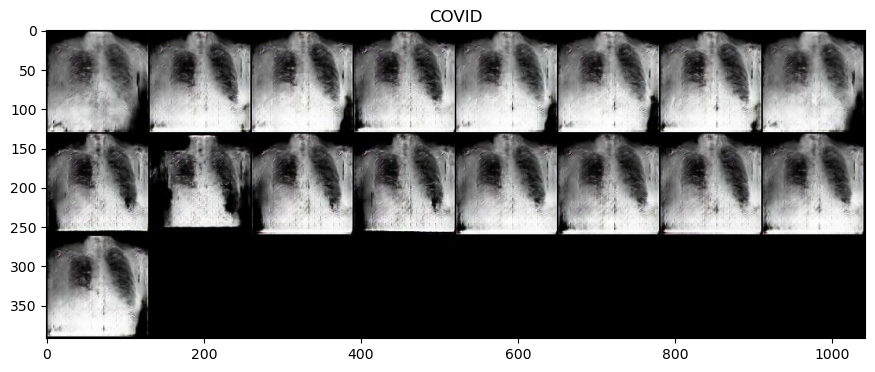

In [4]:
dis ="COVID"# input("enter disease")
genrate(device,dis)

torch.Size([17, 4, 128, 128])
torch.Size([17, 64, 64, 64])
torch.Size([17, 128, 32, 32])
torch.Size([17, 256, 16, 16])
torch.Size([17, 1024, 4, 4])
torch.Size([17, 1, 1, 1])


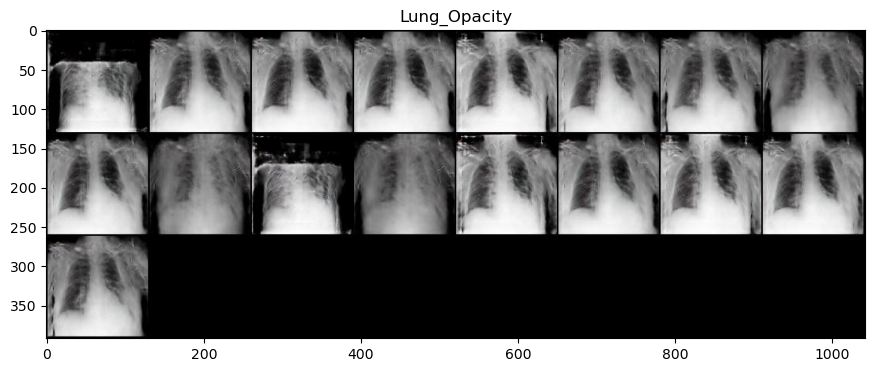

In [5]:
dis ="Lung_Opacity"# input("enter disease")
genrate(device,dis)

torch.Size([17, 4, 128, 128])
torch.Size([17, 64, 64, 64])
torch.Size([17, 128, 32, 32])
torch.Size([17, 256, 16, 16])
torch.Size([17, 1024, 4, 4])
torch.Size([17, 1, 1, 1])


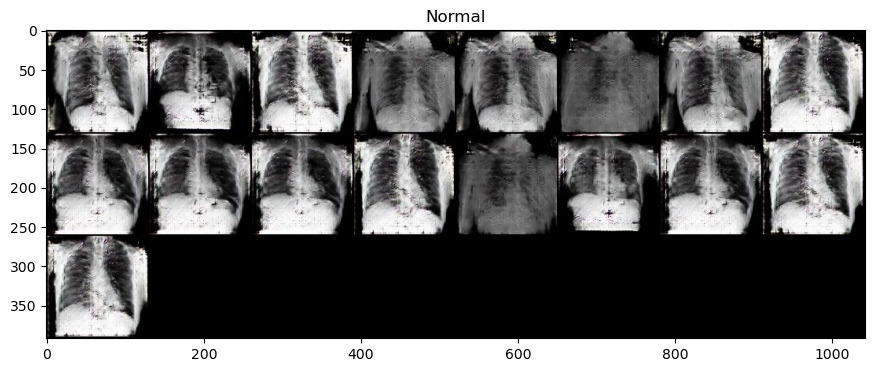

In [11]:
dis ="Normal"# input("enter disease")
genrate(device,dis)

torch.Size([17, 4, 128, 128])
torch.Size([17, 64, 64, 64])
torch.Size([17, 128, 32, 32])
torch.Size([17, 256, 16, 16])
torch.Size([17, 1024, 4, 4])
torch.Size([17, 1, 1, 1])


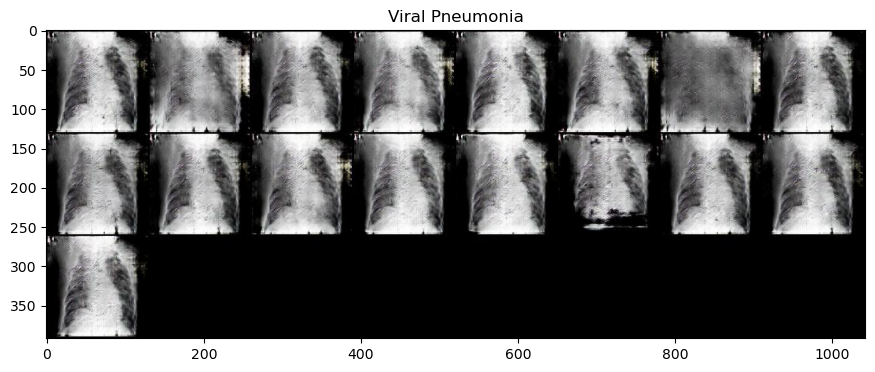

In [8]:
dis ="Viral Pneumonia"# input("enter disease")
genrate(device,dis)